<a href="https://colab.research.google.com/github/liachicue/Linear_Regression_Models/blob/main/InsuranceBayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reclamación de Seguros Método Bayesiano

**Machine Learning**

**Universidad Tecnológica de Pereira**

*Maestría en Ingeniería de Sistemas y Computación*

*Prof. Hernán Felipe García Arias, PhD*

*2021-2*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import  r2_score,mean_squared_error
from ipywidgets import  interact, widgets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insuranceDB.csv to insuranceDB.csv


Librería PANDAS: https://pandas.pydata.org/

In [ ]:
# Carguemos nuestra base de datos

dataSet = pd.read_csv('insuranceDB.csv')
dataSet = dataSet.dropna()


In [ ]:
#Etiquetado de Datos

dataSetNum = dataSet
# 0 = Fem, 1 = Male
dataSet['sex'] = dataSet['sex'].astype('category')
dataSetNum['sex'] = dataSet['sex'].cat.codes

# 0 = No, 1 = yes
dataSet['smoker'] = dataSet['smoker'].astype('category')
dataSetNum['smoker'] = dataSet['smoker'].cat.codes

#0 = northeast, 1 = northwest, 2 = southeast, 3 = southwest
dataSet['region'] = dataSet['region'].astype('category')
dataSetNum['region'] = dataSet['region'].cat.codes

#dataSetNum[:10]

Como realizaremos predicciones de los cargos al seguro, se deben separar los conjuntos de datos en Train y Test.

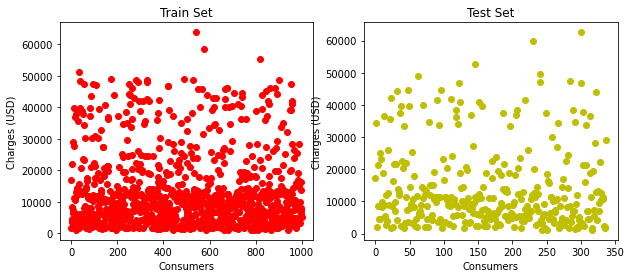

In [ ]:
X = dataSetNum.drop(columns='charges').values
y = dataSetNum['charges'].values

# Trainset, contiene los primeros 1000
Xtrain = X[:1000,:] 
ytrain = y[:1000]

# Testset, contiene los ultimos 1000
Xtest = X[1000:,:]
ytest = y[1000:]

fig, ax = plt.subplots(ncols= 2, figsize = (10,4))

#Lado Izq
ax[0].plot(ytrain,'or')
ax[0].set_title('Train Set')
ax[0].set_ylabel('Charges (USD)')
ax[0].set_xlabel('Consumers')

#Lado Der
ax[1].plot(ytest,'oy')
ax[1].set_title('Test Set')
ax[1].set_ylabel('Charges (USD)')
ax[1].set_xlabel('Consumers')

plt.show()

Nuestro dataset es de $N\times D$ donde $D = 6$

In [ ]:
@interact(CantBase = (1,100,3), Alfa_Param = (1.,100.,3.), Lambda_Param = widgets.FloatSlider(min=1e-4, max=1, step=0.001, value=0.1,readout_format='.4f'))
def Experimeto1(CantBase,Alfa_Param,Lambda_Param):
  # Matriz de Vandermode para emular la función base Polinomial de orden M
  Ntr, D = Xtrain.shape
  Nte, D = Xtest.shape
  
  # Definimos la cantidad de funciones base
  
  PHI_train = np.zeros((Ntr,(CantBase+1)*D))
  
  PHI_test = np.zeros((Nte,(CantBase+1)*D))
  
  # Proyectemos cada vector (observaciones) de D=6 para armar nuestra matriz de diseño
  for n in range(0,len(ytrain)):
    # Indexamos la observacion n-ésima
    x_n = Xtrain[n,:]
    # proyectamos este x_n utilizando la función base
    phi_xn = np.vander(x_n,CantBase+1, increasing=True)
    PHI_train[n,:] = phi_xn.flatten()
    
  for n in range(0,len(ytest)):
    # Indexamos la observacion n-ésima
    x_n = Xtest[n,:]
    # proyectamos este x_n utilizando la función base
    phi_xn = np.vander(x_n,CantBase+1, increasing=True)
    PHI_test[n,:] = phi_xn.flatten()
  
  init = [Alfa_Param,Lambda_Param]
  # Instanciemos nuestros modelo Bayesiano
  modelReg = BayesianRidge(tol = 1e-6, fit_intercept=False, compute_score=True, alpha_init=Alfa_Param, lambda_init=Lambda_Param)
  
  # Creemos entonces nuestros parámetros iniciales del problema alpha y lambda
  modelReg.fit(PHI_train,ytrain)
  
  ymean_test, ystd_test = modelReg.predict(PHI_test, return_std=True)  # Realizamos la predicción
  
  #print(ymean_test)
  #print(ystd_test)

  plt.plot(ytest,'-r')
  plt.plot(ymean_test,'-b')
  plt.fill_between(np.linspace(0,len(ytest),len(ytest)),ymean_test-ystd_test,ymean_test+ystd_test,color='pink',alpha=0.5)
  plt.legend(('Observaciones','Datos','Std predictiva'))

  
  titulo = "$\\alpha$_init$ = {:.2f},\\ \\lambda$_ini$={}$".format(Alfa_Param,Lambda_Param)
  
  #stringResultado = "$\\alpha = {:.2f}$\n $\\lambda={:.3f}$\n $L = {:.1f}$".format(modelReg.alpha_,modelReg.lambda_, modelReg.scores_[-1])
  #plt.text(0.05,-1.0,stringResultado)
  plt.title(titulo)
  plt.show()
  
  print('Parámetro Alpha:', modelReg.alpha_)
  print('Parámetro lambda:', modelReg.lambda_)
  print('Parámetro L:', modelReg.scores_[-1])

interactive(children=(IntSlider(value=49, description='CantBase', min=1, step=3), FloatSlider(value=49.0, desc…

Con el fin de observar el comportamiento de la regresión bayesiana lineal, exploremos tres casos en la simulación.

Sí, por ejemplo, la cantidad de parámetros del modelo $CantBase$ es muy grande, la dispersión de las observaciones superará el valor de los datos de entrenamiento. 

Sí $CantBase$ es un valor medio, la proyección tendera a cero.

Ahora, cuando $CantBase$ resulta en un valor pequeño pero no igual a cero, la respuesta será una dispersión para valores entre $[0 a 40,000]usd. 